In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
wl_df_p21 = pd.read_csv(
    r'C:\Users\mrpro\Documents\Code\CBI\Gap_Filling\pd_1732232133.csv',
    parse_dates=[0],
    na_values=[-999, -99, 99, 'NA', 'RM'],
    skipfooter=6,     # Skips the last 6 lines
    engine='python'   
)

wl_df_p21.columns = ['date', 'pwl', 'bwl', 'harmwl']

# Calculate surges
wl_df_p21['pwl surge'] = wl_df_p21['pwl'] - wl_df_p21['harmwl']
wl_df_p21['bwl surge'] = wl_df_p21['bwl'] - wl_df_p21['harmwl']


wl_df_rb = pd.read_csv(
    r'C:\Users\mrpro\Documents\Code\CBI\Gap_Filling\pd_1735839238.csv',
    parse_dates=[0],
    na_values=[-999, -99, 99, 'NA', 'RM'],
    skipfooter=6,     # Skips the last 6 lines
    engine='python'   
)

wl_df_rb.columns = ['date', 'pwl', 'bwl', 'harmwl']

# Calculate surges
wl_df_rb['pwl surge'] = wl_df_rb['pwl'] - wl_df_rb['harmwl']
wl_df_rb['bwl surge'] = wl_df_rb['bwl'] - wl_df_rb['harmwl']


In [3]:
wl_df_p21

,date,pwl,bwl,harmwl,pwl surge,bwl surge
0,2016-01-01 00:00:00,1.805,2.619,1.436,0.369,1.183
1,2016-01-01 00:06:00,1.808,2.622,1.441,0.367,1.181
2,2016-01-01 00:12:00,1.826,2.634,1.446,0.380,1.188
3,2016-01-01 00:18:00,1.843,2.647,1.451,0.392,1.196
4,2016-01-01 00:24:00,1.850,2.650,1.456,0.394,1.194
...,...,...,...,...,...,...
87835,2016-12-31 23:30:00,2.011,2.756,1.536,0.475,1.220
87836,2016-12-31 23:36:00,2.024,2.766,1.541,0.483,1.225
87837,2016-12-31 23:42:00,2.022,2.765,1.546,0.476,1.219
87838,2016-12-31 23:48:00,2.029,2.770,1.551,0.478,1.219


In [4]:
wl_df_rb

,date,pwl,bwl,harmwl,pwl surge,bwl surge
0,2016-01-01 00:00:00,6.403,1.056,6.134,0.269,-5.078
1,2016-01-01 00:06:00,6.408,1.061,6.138,0.270,-5.077
2,2016-01-01 00:12:00,6.401,1.058,6.141,0.260,-5.083
3,2016-01-01 00:18:00,6.411,1.063,6.145,0.266,-5.082
4,2016-01-01 00:24:00,6.421,1.066,6.149,0.272,-5.083
...,...,...,...,...,...,...
87835,2016-12-31 23:30:00,6.545,1.173,6.203,0.342,-5.030
87836,2016-12-31 23:36:00,6.543,1.171,6.209,0.334,-5.038
87837,2016-12-31 23:42:00,6.559,1.182,6.215,0.344,-5.033
87838,2016-12-31 23:48:00,6.551,1.177,6.221,0.330,-5.044


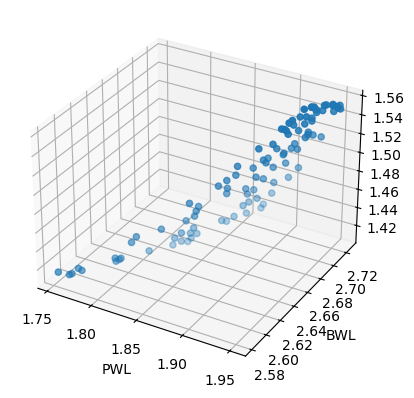

In [5]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


x = wl_df_p21['pwl'][0:100]
y= wl_df_p21['bwl'][0:100]
z= wl_df_p21['harmwl'][0:100]

plt.xlabel('PWL')
plt.ylabel('BWL')
#plt.zlabel('harmwl')

ax.scatter(x, y, z, label='parametric curve')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
wl_df = wl_df_p21.copy()
wl_df['pwl rb'] = wl_df_rb['pwl']
wl_df['bwl rb'] = wl_df_rb['bwl']


wl_df2 = wl_df.copy()
wl_df = wl_df.dropna()

In [8]:
X = np.column_stack((wl_df['bwl rb'],wl_df['bwl']))

y = wl_df['pwl']
model = LinearRegression()
model.fit(X, y)
# Get coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predict the dependent variable
y_pred = model.predict(X)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Intercept: -1.7792764803136236
Coefficients: [0.01978828 1.36657861]
Mean Squared Error: 0.00034629559035745464
R-squared: 0.9929055565421865


In [9]:
wl_df['values'] = (-1.7792764803136254 + 0.01978828*wl_df['bwl rb'] + 1.36657861*wl_df_p21['bwl'])



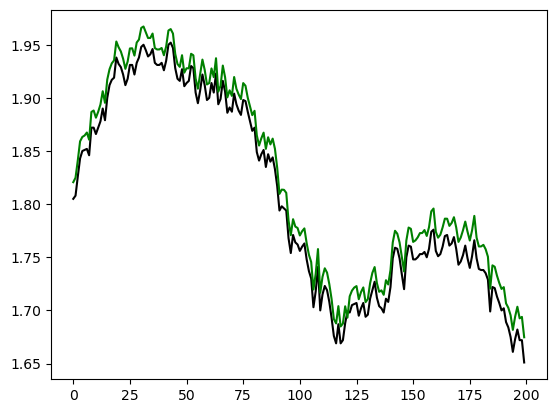

In [10]:
plt.plot(wl_df['pwl'][0:200], color = 'black')
plt.plot(wl_df['values'][0:200], color = 'green')

In [11]:
wl_df['difference'] = wl_df['pwl'] - wl_df['values']

print(wl_df['difference'].mean)

<bound method Series.mean of 0       -0.015689
1       -0.016888
2       -0.015228
3       -0.016092
4       -0.013251
           ...   
87835    0.000774
87836    0.000148
87837   -0.000703
87838   -0.000437
87839    0.001977
Name: difference, Length: 84465, dtype: float64>


In [12]:
import torch
import torch_directml
import torch.nn as nn
import torch.optim as optim
import numpy as np

device = torch_directml.device()


In [13]:

X = torch.tensor(wl_df[['bwl', 'pwl rb', 'bwl rb']].to_numpy(), dtype=torch.float32).to(device)  # Shape (n_samples, n_features)
y = torch.tensor(wl_df['pwl'].to_numpy(), dtype=torch.float32).unsqueeze(1).to(device)

# Define a more complex neural network
class EnhancedNN(nn.Module):
    def __init__(self, input_size):
        super(EnhancedNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),  # First hidden layer with 128 neurons
            nn.ReLU(),                  # Nonlinear activation function
            nn.Linear(128, 64),         # Second hidden layer with 64 neurons
            nn.ReLU(),                  # Another nonlinear activation
            nn.Linear(64, 32),          # Third hidden layer with 32 neurons
            nn.ReLU(),                  # Another nonlinear activation
            nn.Linear(32, 1)            # Output layer (1 output)
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
input_size = X.shape[1]  # Number of input features
model = EnhancedNN(input_size).to(device)  # Move model to DirectML device

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Smaller learning rate for finer adjustments

# Train the model
epochs = 5000  # Increase the number of epochs
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Test the model
test_input = torch.tensor([[6.0, 1.2, 3.4]], dtype=torch.float32).to(device)  # Input for prediction
predicted_output = model(test_input)

print(f"Predicted output for input {test_input.tolist()}: {predicted_output.item()}")

f:\Anaconda\Lib\site-packages\torch\optim\adam.py:534: UserWarning: The operator 'aten::lerp.Scalar_out' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at C:\__w\1\s\pytorch-directml-plugin\torch_directml\csrc\dml\dml_cpu_fallback.cpp:17.)
  torch._foreach_lerp_(device_exp_avgs, device_grads, 1 - beta1)


Epoch 1000/5000, Loss: 0.0010730557842180133
Epoch 2000/5000, Loss: 0.000255081889918074
Epoch 3000/5000, Loss: 0.00022345915203914046
Epoch 4000/5000, Loss: 0.0004614032222889364
Epoch 5000/5000, Loss: 0.00024552675313316286
Predicted output for input [[6.0, 1.2000000476837158, 3.4000000953674316]]: 5.846139907836914


In [14]:
from sklearn.model_selection import train_test_split

# Assuming wl_df is a pandas DataFrame
X = wl_df[['bwl', 'pwl rb', 'bwl rb']].to_numpy()  # Features
y = wl_df['pwl'].to_numpy()  # Target

# Split into training and testing datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


device = torch_directml.device()
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)  # Add dimension
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)


In [15]:
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}")


Epoch 100/5000, Training Loss: 0.0002399863296886906
Epoch 200/5000, Training Loss: 0.00023557490203529596
Epoch 300/5000, Training Loss: 0.00023251872335094959
Epoch 400/5000, Training Loss: 0.0002301836502738297
Epoch 500/5000, Training Loss: 0.0002283261128468439
Epoch 600/5000, Training Loss: 0.00022680219262838364
Epoch 700/5000, Training Loss: 0.0002254852734040469
Epoch 800/5000, Training Loss: 0.00022429336968343705
Epoch 900/5000, Training Loss: 0.00022326657199300826
Epoch 1000/5000, Training Loss: 0.00022235274082049727
Epoch 1100/5000, Training Loss: 0.00022153192549012601
Epoch 1200/5000, Training Loss: 0.00022078359324950725
Epoch 1300/5000, Training Loss: 0.000220021465793252
Epoch 1400/5000, Training Loss: 0.0002193374530179426
Epoch 1500/5000, Training Loss: 0.00021868571639060974
Epoch 1600/5000, Training Loss: 0.0002180482988478616
Epoch 1700/5000, Training Loss: 0.0002174165565520525
Epoch 1800/5000, Training Loss: 0.0002167834754800424
Epoch 1900/5000, Training Los

In [16]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculations
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)
    print(f"Test Loss: {test_loss.item()}")


Test Loss: 0.0002143369783880189


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_directml  # DirectML for AMD GPU support

# Set up DirectML device
device = torch_directml.device()

X = torch.tensor(wl_df['bwl'].to_numpy(), dtype=torch.float32).unsqueeze(1).to(device)  # Shape: (n_samples, 1)
y = torch.tensor(wl_df['pwl'].to_numpy(), dtype=torch.float32).unsqueeze(1).to(device)  # Shape: (n_samples, 1)

# Normalize input for better training
X_mean, X_std = X.mean(), X.std()
X = (X - X_mean) / X_std  # Normalize X

# Define a more complex neural network with one input and one output
class EnhancedNN(nn.Module):
    def __init__(self):
        super(EnhancedNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),  # First hidden layer with 64 neurons
            nn.ReLU(),         # Nonlinear activation function
            nn.Linear(64, 32), # Second hidden layer with 32 neurons
            nn.ReLU(),         # Another nonlinear activation
            nn.Linear(32, 16), # Third hidden layer with 16 neurons
            nn.ReLU(),         # Another nonlinear activation
            nn.Linear(16, 1)   # Output layer
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
model = EnhancedNN().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
epochs = 3000
for epoch in range(epochs):
    model.train()  # Set model to training mode
    predictions = model(X)
    loss = criterion(predictions, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}")

# Testing the model
model.eval()  # Set model to evaluation mode
test_input = torch.tensor([[2.619]], dtype=torch.float32).to(device)  # Example input
test_input_normalized = (test_input - X_mean) / X_std  # Normalize input
predicted_output = model(test_input_normalized)

print(f"Predicted output for input {test_input.item()}: {predicted_output.item()}")


Epoch 1000/3000, Training Loss: 0.0028913484420627356
Epoch 2000/3000, Training Loss: 0.0002688459353521466
Epoch 3000/3000, Training Loss: 0.0002383266983088106
Predicted output for input 2.61899995803833: 1.8225252628326416


In [18]:
wl_df

,date,pwl,bwl,harmwl,pwl surge,bwl surge,pwl rb,bwl rb,values,difference
0,2016-01-01 00:00:00,1.805,2.619,1.436,0.369,1.183,6.403,1.056,1.820689,-0.015689
1,2016-01-01 00:06:00,1.808,2.622,1.441,0.367,1.181,6.408,1.061,1.824888,-0.016888
2,2016-01-01 00:12:00,1.826,2.634,1.446,0.380,1.188,6.401,1.058,1.841228,-0.015228
3,2016-01-01 00:18:00,1.843,2.647,1.451,0.392,1.196,6.411,1.063,1.859092,-0.016092
4,2016-01-01 00:24:00,1.850,2.650,1.456,0.394,1.194,6.421,1.066,1.863251,-0.013251
...,...,...,...,...,...,...,...,...,...,...
87835,2016-12-31 23:30:00,2.011,2.756,1.536,0.475,1.220,6.545,1.173,2.010226,0.000774
87836,2016-12-31 23:36:00,2.024,2.766,1.541,0.483,1.225,6.543,1.171,2.023852,0.000148
87837,2016-12-31 23:42:00,2.022,2.765,1.546,0.476,1.219,6.559,1.182,2.022703,-0.000703
87838,2016-12-31 23:48:00,2.029,2.770,1.551,0.478,1.219,6.551,1.177,2.029437,-0.000437
